<h4>Importing Libraries</h4>

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<h4>Data Collection and Processing</h4>

In [323]:
gold_data = pd.read_csv("gld_price_data.csv")

In [324]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [325]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [326]:
gold_data.shape

(2290, 6)

In [327]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [328]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<h4>Getting the Statistical Measures of the Data</h4>

In [329]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<h4>Correlation</h4>

In [330]:
correlation = gold_data.corr()

<AxesSubplot:>

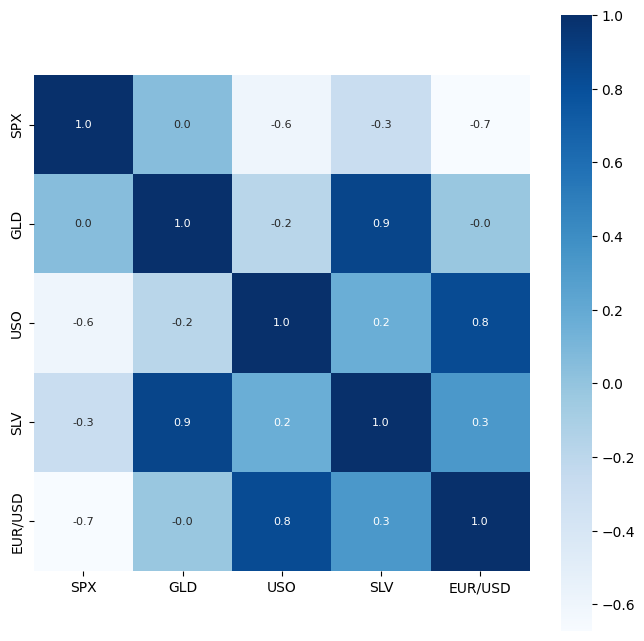

In [331]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [332]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\DELL\Desktop\ds\ML Projects\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='GLD', ylabel='Density'>

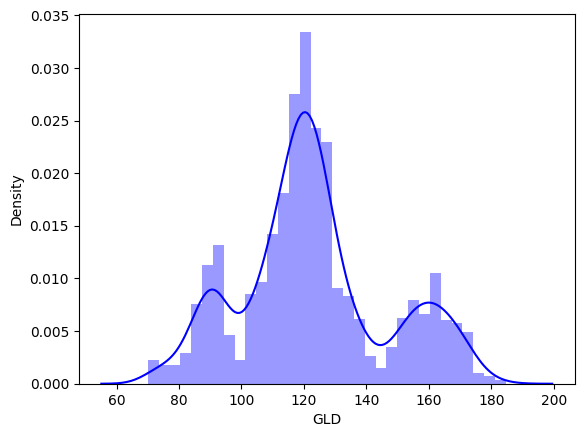

In [333]:
sns.distplot(gold_data['GLD'], color = 'blue')

<h4>Splitting the Features and the Target</h4>
<h6><i>In this GLD is the out put and SPX, SLV, EUR are the features</i></h6>

In [334]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [335]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<h4>Splitting into Train and Test Data</h4>

In [336]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [337]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


<h4>Standardize the dataset</h4>

In [338]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [339]:
# X_trian = scaler.fit_transform(X_train)

In [340]:
# X_test = scaler.fit_transform(X_test)

In [341]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [342]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


<h4>Model Training</h4>


In [343]:
regressor = RandomForestRegressor(n_estimators = 100)

In [344]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

<h4>Model Estimation</h4>


In [345]:
test_data_predict = regressor.predict(X_test)
print(test_data_predict)

[168.62659916  81.96799983 116.04840019 127.7177007  120.46860133
 154.93519756 150.22339887 126.02209999 117.68559884 126.01600069
 116.7946007  172.15070063 141.82499928 167.67019881 115.23509979
 117.42610031 138.78710329 170.22800131 158.89310283 158.75719992
 155.1413006  125.40020047 175.82419947 156.99490328 125.28610025
  93.74749956  78.00449943 120.4842999  119.13349966 167.38859955
  88.22950045 125.26720004  91.01520059 117.71740001 121.18849862
 136.76150014 115.57960123 115.07910078 144.77039965 106.98480097
 104.40370221  87.32179804 126.5395009  118.02420029 154.07009842
 119.7280999  108.25920054 108.0787983   93.13860042 127.20529774
  74.79480043 113.60049928 121.16760036 111.2195992  118.94329895
 120.63309983 158.13360039 169.64550063 147.12199675  85.58649841
  94.42640042  86.67979927  90.75010013 119.04340095 126.49040069
 127.62200012 169.58629943 122.27469964 117.463099    98.50370038
 167.96560081 143.08879832 132.44980282 121.14630218 120.85869949
 119.75820

In [346]:
predict = regressor.predict([[1352.069946, 70.93, 16.299999, 1.47741 ]])
predict

c:\Users\DELL\Desktop\ds\ML Projects\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([89.907701])

<h4>Compare the actual and predicted values</h4>


In [347]:
error_score = metrics.r2_score(test_data_predict, Y_test)
print("R Squared Error is : ", error_score)

R Squared Error is :  0.9894225334395282


In [348]:
Y_test = list(Y_test)

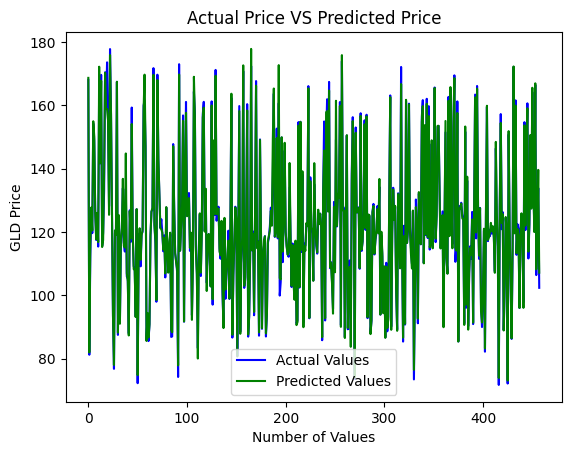

In [349]:
plt.plot(Y_test, color= 'blue', label = "Actual Values")
plt.plot(test_data_predict, color ='green', label= "Predicted Values")
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<h4>Pickling the Model File for Deployment</h4>

In [350]:
import pickle
pickle.dump(RandomForestRegressor, open('reg_model.pkl','wb'))

In [351]:
pickled_model = pickle.load(open('reg_model.pkl', 'rb'))

In [353]:
pickled_model.predict([[1352.069946, 70.93, 16.299999, 1.47741 ]], 0)

TypeError: [[1352.069946, 70.93, 16.299999, 1.47741]] is not an estimator instance.